# Predikce hudebních žánrů - semestrální projekt 

Daniel Jírovec, Albert Mírek

Tato semestrální práce se zabývá zpracováním datasetu "Music Genre Prediction". Dataset byl získán ze stránky Kaggle.com, konkrétně na tomto odkazu: https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre

Tento Jupyter Notebook se skládá z několika částí:
* Popis datasetu a cíl projektu
* Předzpracování dat
* Vizualizace dat
* Tvorba modelů
* Fine-tuning metaparametrů
* Výsledky

## Popis datasetu a cíl projektu

Data byla původně shromážděna pomocí Spotify API. Dataset obsahuje informace o jednotlivých hudebních skladbách. Má celkem 18 atributů, z čehož 17 popisuje unikátní vlastnosti každé skladby a poslední atribut, cílový, udává hudební žánr skladby. Cílový atribut může nabývat 10 hodnot (10 žánrů). Dataset má celkem 50 000 instancí, na každou kategorii cílového atributu připadá 5 000 instancí.

Cílem tohoto semestrálního projektu je pomocí metod strojového učení a příslušných modelů provést klasifikační úlohu a jednotlivé instance skladeb na základě atributů klasifikovat do příslušného hudebního žánru.

### Atributy instancí datasetu

* *instance_id*: číslo instance


* *artist_name*: jméno umělce


* *track_name*: jméno skladby


* *popularity*: popularita skladby; čím větší číslo, tím je skladba populárnější


* *acousticness*: míra spolehlivosti měřena od 0.0 do 1.0, zda je skladba akustická; 1.0 představuje vysokou konfidenci, že skladba je akustická


* *danceability*: popisuje, jak vhodná je skladba pro tanec na základě kombinace hudebních prvků včetně tempa, stability rytmu, taktu a celkové pravidelnosti; při hodnotě 0.0 je píseň nejméně vhodná pro tanec a při hodnotě 1.0 je nejvíce vhodná


* *duration_ms*: délka trvání skladby v milisekundách


* *energy*: míra energie měřena od 0.0 do 1.0; představuje míru aktivity a intenzity skladby


* *instrumentalness*: instrumentálnost říká, v jaké míře skladba neobsahuje vokály, přičemž zvuky jako "Ooh" a "Aah" jsou v tomto konextu považovány za instrumentální; rap nebo mluvené slovo jsou jednoznačně „vokální“; čím blíže je hodnota instrumentality k 1.0, tím větší je pravděpodobnost, že skladba neobsahuje žádný vokální obsah - hodnoty nad 0.5 mají představovat instrumentální skladby, ale spolehlivost je vyšší, když se hodnota blíží 1.0


* *key*: tónina, ve které se skladba nachází; celá čísla se mapují na výšky pomocí standardní notace "Pitch Class"; např. 0 = C, 1 = C♯/D♭, 2 = D a tak dále; pokud nebyla detekována žádná tónina, hodnota je -1


* *liveness*: detekuje přítomnost publika v nahrávce; vyšší hodnoty atributu představují zvýšenou pravděpodobnost, že nahrávka byla pořízena živě s publikem; hodnota nad 0.8 znamená velkou pravděpodobnost, že je skladba hraná živě

* *loudness*: celková hlasitost skladby v decibelech (dB); hodnoty hlasitosti jsou zprůměrovány přes celou délku skladby a jsou užitečné pro porovnání relativní hlasitosti skladeb; hodnoty se obvykle pohybují mezi -50 db a 0 db


* *mode*: označuje modalitu (Major = Dur nebo Minor = Moll) skladby - typ stupnice, z níž je odvozen její melodický obsah; major je reprezentován 1 a Minor je 0


* *speechiness*: detekuje přítomnost mluveného slova ve stopě; čím více se nahrávka podobá řeči (např. talk show, audiokniha, podcast), tím se hodnota atributu blíží hodnotě 1.0; hodnoty nad 0.66 popisují stopy, které jsou pravděpodobně celé tvořeny mluveným slovem; hodnoty mezi 0.33 a 0.66 popisují stopy, které mohou obsahovat hudbu i řeč, buď v sekcích, nebo ve vrstvách, včetně případů, jako je rapová hudba; hodnoty pod 0.33 s největší pravděpodobností představují hudbu a další skladby, které neobsahují řeč


* *tempo*: celkové odhadované tempo skladby v úderech za minutu (BPM); v hudební terminologii je tempo rychlost dané skladby a odvozuje se přímo od průměrné doby trvání taktu


* *time_signature* (původně **obtained_date -> v datasetu je uveden název atributu obtained_date, ale hodnoty, což jsou datumy ze začátku dubna (1/4, 3/4 atd.), nedávájí smysl; po našem průzkumu bylo zjištěno, že sloupec měl špatný datový typ a ve sktečnosti se jedná o atribut time_signature -> vysvětlení v popisu atributu dále)**: odhadovaný takt; označení taktu je notační konvence, která určuje, kolik dob je v každém taktu; označení taktu se pohybuje od 1 do 5 označující označení taktu "1/4", "2/4", "3/4", "4/4" a "5/4"


* *valence*: míra od 0.0 do 1.0 popisující hudební pozitivitu v dané skladbě; skladby s vysokou hodonotu zní pozitivněji (např. šťastně, vesele, euforicky), zatímco skladby s nízkou hodnotou znějí negativněji (např. smutně, depresivně, naštvaně)


* *music_genre*: hudební žánr skladby; může nabývat 10 hodnot - Electronic, Anime, Jazz, Alternative, Country, Rap, Blues, Rock, Classical a Hip-Hop 

## Předzpracování dat

In [277]:
#imports of required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [70]:
#loading of dataset
df = pd.read_csv('./dataset/music_genre.csv', sep=',')

In [71]:
#exploring data
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [72]:
#looking at the shape of data
df.shape

(50005, 18)

In [73]:
#looking for missing values
df[df.isna().any(axis=1)]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
#search for '?' values and convert them to nan
df[df=='?'] = np.nan
print(df.isnull().sum())

instance_id            5
artist_name            5
track_name             5
popularity             5
acousticness           5
danceability           5
duration_ms            5
energy                 5
instrumentalness       5
key                    5
liveness               5
loudness               5
mode                   5
speechiness            5
tempo               4985
obtained_date          5
valence                5
music_genre            5
dtype: int64


In [75]:
#drop all missing values
df = df.dropna()

In [76]:
#reseting index
df.reset_index(inplace = True)

In [77]:
#remove features with no significance for prediction
df = df.drop(["index", "instance_id", "track_name", "artist_name"], axis=1)

In [78]:
#data is now clean of missing values and only 15 features remains
df.shape

(45020, 15)

In [79]:
#looking at the data
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [80]:
#fixing the correctness of 'obtained_date' column
#giving column correct name
df.rename(columns = {'obtained_date':'time_signature'}, inplace = True)

In [81]:
#looking at the value counts of 'time_signature' column
df['time_signature'].value_counts()

4-Apr    40301
3-Apr     3657
5-Apr      710
1-Apr      352
Name: time_signature, dtype: int64

In [82]:
#replacing values with correct ones, 4 meaning 4/4; 3 meaning 3/3; 5 meaning 5/4 and 1 meaning 1/4
df['time_signature'] = df['time_signature'].replace('4-Apr', 4)
df['time_signature'] = df['time_signature'].replace('3-Apr', 3)
df['time_signature'] = df['time_signature'].replace('5-Apr', 5)
df['time_signature'] = df['time_signature'].replace('1-Apr', 1)

In [83]:
#looking at the value counts of 'time_signature' column after replacement of values
df['time_signature'].value_counts()

4    40301
3     3657
5      710
1      352
Name: time_signature, dtype: int64

In [84]:
#encode 'key' column with LabelEncoder()
key_encoder = LabelEncoder()
df['key'] = key_encoder.fit_transform(df['key'])
#df['key'].unique() #print encoded values

In [85]:
#encode 'mode' column with LabelEncoder()
mode_encoder = LabelEncoder()
df['mode'] = mode_encoder.fit_transform(df['mode'])
#df['mode'].unique() #print encoded values

In [86]:
#grouping similar musical genres of target variable for better classification results
#resulting categories are: Electronic/Anime, Jazz/Blues, Alternative, Rock/Country, Rap/Hip-Hop, Classical
df['music_genre'] = df['music_genre'].replace({'Rap': 'Rap/Hip-Hop', 'Hip-Hop': 'Rap/Hip-Hop',
                                               'Jazz': 'Jazz/Blues', 'Blues': 'Jazz/Blues',
                                               'Anime': 'Electronic/Anime', 'Electronic': 'Electronic/Anime',
                                               'Rock': 'Rock/Country', 'Country': 'Rock/Country'})

In [87]:
#value counts of music_genre after merging of categories
df['music_genre'].value_counts()

Rock/Country        9047
Rap/Hip-Hop         9024
Jazz/Blues          8991
Electronic/Anime    8963
Classical           4500
Alternative         4495
Name: music_genre, dtype: int64

#### Training and testing data

In [88]:
#labels are the values we want to predict
y = df['music_genre']

#Remove the labels from the features
X = df.drop('music_genre', axis = 1)

In [89]:
#split into test and train sets (#scikit-learn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (33765, 14)
Training Labels Shape: (33765,)
Testing Features Shape: (11255, 14)
Testing Labels Shape: (11255,)


## Vizualizace dat

In [31]:
#isolating numeric features
numeric_features = df["key", "music_genre", "mode", "tempo"], axis = 1)

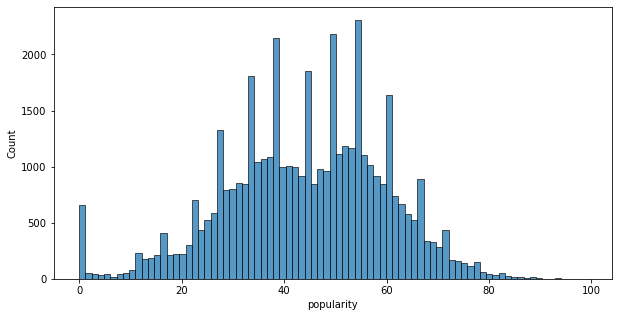

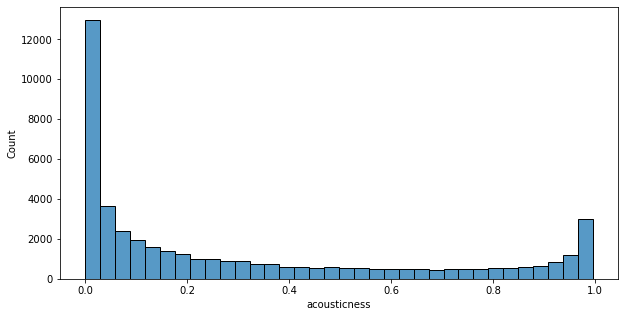

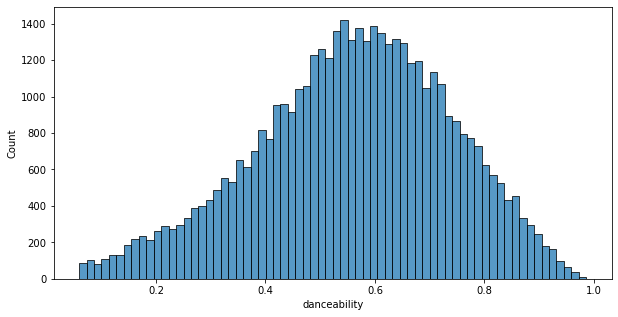

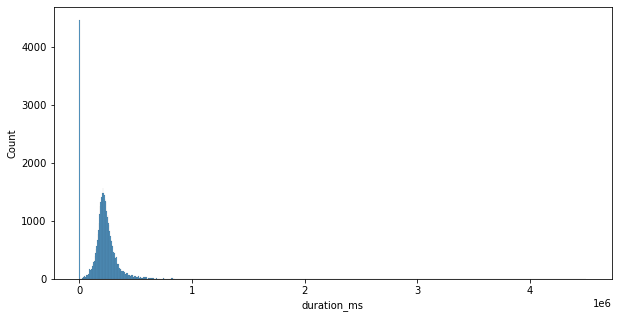

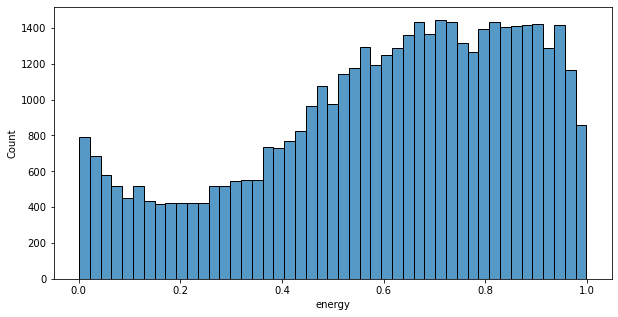

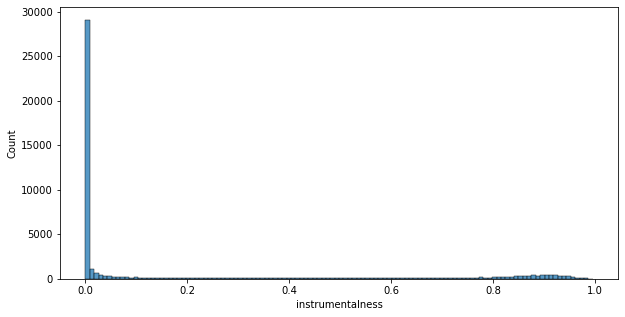

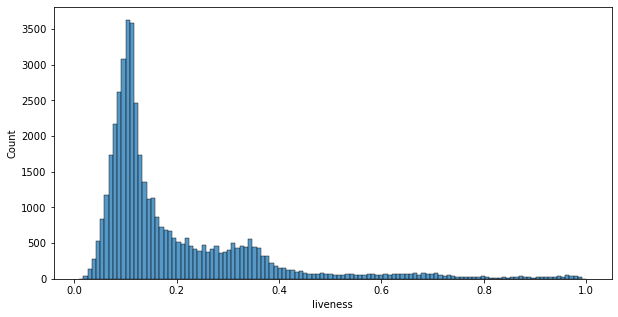

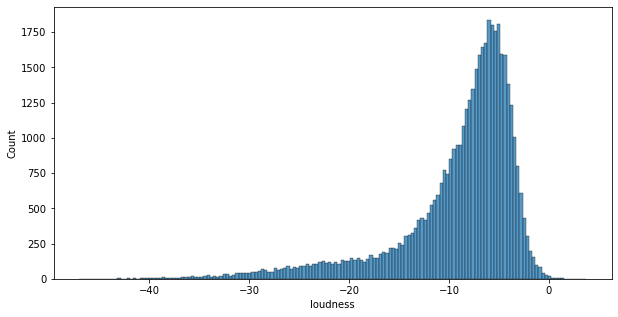

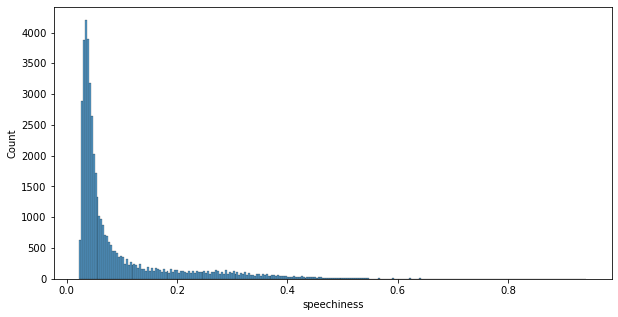

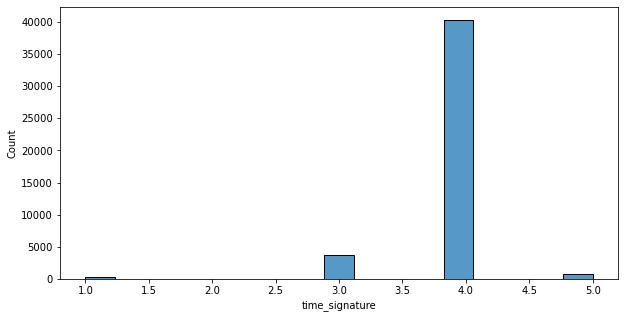

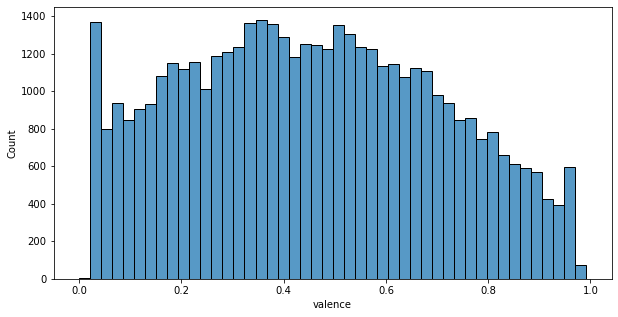

In [36]:
#print histograms for numeric features
for col in numeric_features :
    plt.figure(figsize=[10,5])
    sns.histplot(df[col])

In [90]:
#statistics for each column
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,time_signature,valence
count,45020.000000,45020.000000,45020.000000,4.502000e+04,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,44.263327,0.306596,0.558532,2.211695e+05,0.599553,0.181843,5.350578,0.193951,-9.137016,0.358641,0.093783,3.911084,0.456394
std,15.553972,0.341391,0.178858,1.276884e+05,0.264510,0.325847,3.460945,0.161715,6.156400,0.479607,0.101469,0.399334,0.247161
min,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.000000,0.009670,-47.046000,0.000000,0.022300,1.000000,0.000000
25%,34.000000,0.020100,0.442000,1.747230e+05,0.432000,0.000000,3.000000,0.096900,-10.860000,0.000000,0.036100,4.000000,0.257000
50%,45.000000,0.145000,0.568000,2.194385e+05,0.642000,0.000159,5.000000,0.126000,-7.284000,0.000000,0.048900,4.000000,0.448000
75%,56.000000,0.551000,0.687000,2.686400e+05,0.815250,0.154000,8.000000,0.244000,-5.177000,1.000000,0.098800,4.000000,0.648000
max,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,11.000000,1.000000,3.744000,1.000000,0.942000,5.000000,0.992000


In [91]:
print(df.shape)

(45020, 15)


## Modely

### Random Forest

In [199]:
#RandomForestClassifier
#create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=25)

#fit the classifier to the training data
clf.fit(X_train, y_train)

#print the accuracy on train and test data
print("Accuracy on train data:", clf.score(X_train, y_train))
print("Accuracy on test data:", clf.score(X_test, y_test))

Accuracy on train data: 0.9948763512512957
Accuracy on test data: 0.7153265215459795


### KNN

In [198]:
#KNN
#create a KNN Classifier with randomly chosen number of 8 neighbors
knn = KNeighborsClassifier(n_neighbors = 8)

#fit the classifier to the training data
knn.fit(X_train,y_train)

#print the accuracy on train and test data
print("Accuracy on train data:", knn.score(X_train, y_train))
print("Accuracy on test data:", knn.score(X_test, y_test))

Accuracy on train data: 0.4698948615430179
Accuracy on test data: 0.29569080408707243


### Logistic Regression

In [269]:
#LogisticRegression
#create a Logistic Regression Classifier
log_reg = LogisticRegression(max_iter=500)

#fit the classifier to the training data
log_reg.fit(X_train,y_train)

#print the accuracy on train and test data
print("Accuracy on train data:", log_reg.score(X_train, y_train))
print("Accuracy on test data:", log_reg.score(X_test, y_test))

Accuracy on train data: 0.4176810306530431
Accuracy on test data: 0.414749000444247


## Naive Bayes

In [288]:
#NaiveBayes
#create a Naive Bayes Classifier
gnb = GaussianNB(var_smoothing=1e-9)

gnb.fit(X_train,y_train)

print("Accuracy on train data:", gnb.score(X_train, y_train))
print("Accuracy on test data:", gnb.score(X_test, y_test))

Accuracy on train data: 0.497675107359692
Accuracy on test data: 0.48822745446468235


## Gradient Boosting

In [283]:
#GradientBoosting
#create a Gradient Boosting Classifier
grc = GradientBoostingClassifier(n_estimators=150, learning_rate=1.0, max_depth=3, random_state=25)
grc.fit(X_train,y_train)
                                 
print("Accuracy on train data:", grc.score(X_train, y_train))
print("Accuracy on test data:", grc.score(X_test, y_test))

Accuracy on train data: 0.7865837405597512
Accuracy on test data: 0.688494002665482


## Fine-tuning metaparametrů

### Random Forest tuning

In [220]:
#tuning RandomForest
#trying multiple variations of parameters
#first set of parameters
clf_1 = RandomForestClassifier(n_estimators=250, criterion='entropy', max_depth=10, min_samples_split=2, min_samples_leaf=2, random_state=25)
clf_1.fit(X_train, y_train)
print("Accuracy on test data:", clf_1.score(X_train, y_train))
print("Accuracy on test data:", clf_1.score(X_test, y_test))

Accuracy on test data: 0.7683399970383533
Accuracy on test data: 0.7139937805419814


In [222]:
#second set of parameters
clf_2 = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=15, min_samples_split=6, min_samples_leaf=2, random_state=25)
clf_2.fit(X_train, y_train)
print("Accuracy on test data:", clf_1.score(X_train, y_train))
print("Accuracy on test data:", clf_1.score(X_test, y_test))

Accuracy on test data: 0.9116540796682956
Accuracy on test data: 0.7273211905819635


In [227]:
#third set of parameters
clf_3 = RandomForestClassifier(n_estimators=750, criterion='entropy', max_depth=15, min_samples_split=4, min_samples_leaf=2, random_state=25)
clf_3.fit(X_train, y_train)
print("Accuracy on test data:", clf_1.score(X_train, y_train))
print("Accuracy on test data:", clf_1.score(X_test, y_test))

Accuracy on test data: 0.9486154301791796
Accuracy on test data: 0.7258107507774323


In [228]:
#storing predictions of the best performing random forest classifier for evaluation
clf_predictions = clf_3.predict(X_test)

### KNN tuning

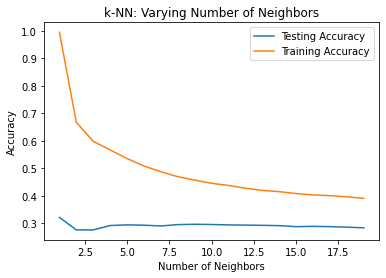

In [202]:
#tuning KNN
#setup arrays to store train and test accuracies
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#loop over different values of k
for i, k in enumerate(neighbors):
    #setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    #fit the classifier to the training data
    knn.fit(X_train, y_train)

    #compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

#generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [158]:
#create a k-NN classifier with tuned parameters; k = 1
knn = KNeighborsClassifier(n_neighbors = 1)

#fit the classifier to the training data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [159]:
#storing the predictions of knn for evaluation
knn_predictions = knn.predict(X_test)

### Logistic Regression tunning

In [273]:
#tuning LogisticRegression
logreg = LogisticRegression(solver="sag", penalty="l2", multi_class="ovr", max_iter=20000)

logreg.fit(X_train, y_train)

print("Accuracy on test data:", logreg.score(X_train, y_train))
print("Accuracy on test data:", logreg.score(X_test, y_test))

C:\Users\danji\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\danji\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\danji\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\danji\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\danji\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Tuned Logistic Regression Parameters: 0.20100695986968756
Accuracy on train data after fine-tuning:: 0.20088849400266548


C:\Users\danji\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [267]:
#storing predictions of logisitic regression classifier for evaluation
logreg_predictions = logreg.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Výsledky

### Random Forest

In [229]:
#accuracy score on test data for random forest
clf_acc = accuracy_score(y_test, clf_predictions)
print(f'clf_accuracy: {clf_acc*100:.2f}%')

clf_accuracy: 72.49%


In [230]:
#classification report for random forest
clf_report = classification_report(y_test, clf_predictions, output_dict=True)
df_report = pd.DataFrame(clf_report).transpose()
df_report

,precision,recall,f1-score,support
Alternative,0.509244,0.265324,0.348877,1142.000000
Classical,0.856604,0.831502,0.843866,1092.000000
Electronic/Anime,0.760377,0.735737,0.747854,2191.000000
Jazz/Blues,0.686266,0.692648,0.689442,2258.000000
Rap/Hip-Hop,0.814002,0.882353,0.846800,2227.000000
Rock/Country,0.648367,0.770576,0.704209,2345.000000
accuracy,0.724922,0.724922,0.724922,0.724922
macro avg,0.712477,0.696357,0.696842,11255.000000
weighted avg,0.716637,0.724922,0.715453,11255.000000


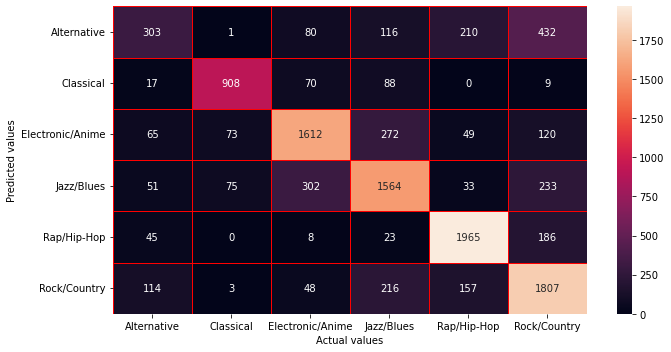

In [244]:
#confusion metrix for random forest
plt.figure(figsize = (10, 5))
sns.heatmap(confusion_matrix(y_test, clf_predictions),
    annot = True,
    fmt = ".0f",
    linewidths = 1,
    linecolor = "red",
    xticklabels = clf_3.classes_,
    yticklabels = clf_3.classes_)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()

### KNN

In [192]:
#accuracy score on test data for knn
knn_acc = accuracy_score(y_test, knn_predictions)
print(f'knn_accuracy: {knn_acc*100:.2f}%')

knn_accuracy: 32.20%


In [184]:
#classification report for knn
knn_report = classification_report(y_test, knn_predictions, output_dict=True)
df_report = pd.DataFrame(knn_report).transpose()
df_report

,precision,recall,f1-score,support
Alternative,0.130763,0.151489,0.140365,1142.00000
Classical,0.343991,0.285714,0.312156,1092.00000
Electronic/Anime,0.363860,0.337289,0.350071,2191.00000
Jazz/Blues,0.295502,0.311337,0.303213,2258.00000
Rap/Hip-Hop,0.445963,0.468792,0.457093,2227.00000
Rock/Country,0.287159,0.278465,0.282745,2345.00000
accuracy,0.321990,0.321990,0.321990,0.32199
macro avg,0.311207,0.305514,0.307607,11255.00000
weighted avg,0.324832,0.321990,0.322862,11255.00000


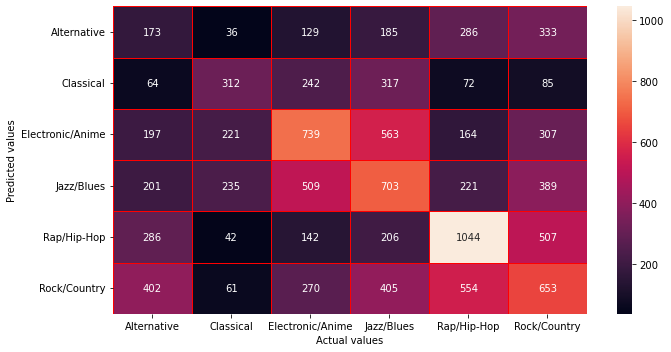

In [245]:
#confusion metrix for knn
plt.figure(figsize = (10, 5))
sns.heatmap(confusion_matrix(y_test, knn_predictions),
    annot = True,
    fmt = ".0f",
    linewidths = 1,
    linecolor = "red",
    xticklabels = knn.classes_,
    yticklabels = knn.classes_)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()

### Logistic Regression

In [266]:
#accuracy score on test data for logistic regression
logreg_acc = accuracy_score(y_test, logreg_predictions)
print(f'log_reg_accuracy: {logreg_acc*100:.2f}%')

NameError: name 'logreg_predictions' is not defined

In [252]:
#classification report for logistic regression
logreg_report = classification_report(y_test, logreg_predictions, output_dict=True)
df_report = pd.DataFrame(logreg_report).transpose()
df_report

C:\Users\danji\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danji\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danji\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
Alternative,0.000000,0.000000,0.000000,1142.000000
Classical,0.793173,0.361722,0.496855,1092.000000
Electronic/Anime,0.476642,0.596075,0.529710,2191.000000
Jazz/Blues,0.389552,0.346767,0.366917,2258.000000
Rap/Hip-Hop,0.422825,0.608891,0.499080,2227.000000
Rock/Country,0.295714,0.353092,0.321866,2345.000000
accuracy,0.414749,0.414749,0.414749,0.414749
macro avg,0.396318,0.377758,0.369071,11255.000000
weighted avg,0.393173,0.414749,0.390749,11255.000000


In [256]:
#confusion metrix for knn
plt.figure(figsize = (10, 5))
sns.heatmap(confusion_matrix(y_test, logreg_predictions),
    annot = True,
    fmt = ".0f",
    linewidths = 1,
    linecolor = "red",
    xticklabels = logreg_cv.classes_,
    yticklabels = logreg_cv.classes_)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()

NameError: name 'logreg_predictions' is not defined

<Figure size 720x360 with 0 Axes>

### Závěr

Na dataset pro klasifikaci hudebních žánrů jsem aplikovali tři různé modely - Random Forest, KNN a Logistickou regresi. Modelem s nejhorším výsledkem se stal KNN s úspěšností pouze 32,20 %. Naopak nejlepším modelem byl Random Forest s počtem estimátorů 750, maximální hloubkou stromu 15 a funkcí pro měření kvality rozdělení "entropy". Dosáhl úspěšnosti na testovacích datech 72,49 %.

Celkově si všechny modely nevedly příliš dobře. Problém by mohl být v počtu tříd (žánrů), do kterých je skladba zařazována. I přes redukci počtu tříd zhruba o polovinu je 6 štítků pořád docela hodně. Dále by mohla také ke špatným výsledkům přispívat povaha datasetu, protože i když skladby spadají do jednoho žánru, jejich vlastnosti nemusí nutně odpovídat nějakým daným pravidlům tohoto žánru.